# B3Y0ND Wellness
## By: Eric Chao

## 1. Inspiration and Motivation
Now more than ever, mental health has become one of the biggest health issues individuals in the U.S. are facing. This epidemic has prompted the creation of B3Y0ND Wellness in order to identify the possibility of predicting for mental health issues and encouraging those who are facing it to seek help. The two core questions we seek to answer are: 

1. Can we accurately predict individuals who may face Mental Health problems?
2. Can we predict Mental Health problems using commonly available and non-invasive information about an individual?

The overall goal in mind for this project is for potential college counselors, work managers, and leaders to use this tool to predict for mental health of their peers using information commonly given. Oftentimes individuals are hesitant to express that they need mental health help, but With this tool, these leaders will have the opportunity to take action towards improving the mental health of their peers and potentially provide them with resources to seek help.

## 2. Data
The data source for this project comes from the CDC in their National Health Interview Survey from 2022. 
Link: https://cdc.gov/nchs/nhis/2022nhis.htm

### 2.1 Data Initialization

In [1]:
import pandas as pd

adultData = pd.read_csv("adult22.csv")
predVar = adultData[["AGEP_A", "SEX_A", "ORIENT_A", "HISPALLP_A", "MARITAL_A", "REGION", "EDUCP_A", "PCNTLT18TC", "PCNT18UPTC", "AFVET_A", "NATUSBORN_A", 
                     "SCHCURENR_A", "EMPLASTWK_A", "FDSRUNOUT_A", "PHSTAT_A", "LSATIS4_A", "HYPEV_A", "CHLEV_A", "CHDEV_A", "ASEV_A", "CANEV_A", "DIBEV_A", 
                     "HEARINGDF_A", "VISIONDF_A", "DIFF_A", "COMDIFF_A", "VSLVYR_A", "SOCERRNDS_A", "SOCSCLPAR_A", "PAYWORRY_A", "CVDDIAG_A", "LASTDR_A", 
                     "RX12M_A", "FGEFRQTRD_A", "SMKEV_A", "SMKCIGST_A", "DRKSTAT_A", "MODNR_A", "MODTPR_A", "SLPHOURS_A", "SLPREST_A", "MASS_A", "MEDITATE_A", 
                     "YOGA_A"]]
colNames = ["Age", "Gender", "SexualOrientation", "Race", "MaritalStatus", "Region", "Education", "Children", "Adults", "Veteran", "USBorn", "InSchool", "Employed", 
            "FoodSecurity", "HealthStatus", "LifeSatisfaction", "Hypertension", "Cholesterol", "Heart Disease", "Asthma", "Cancer", "Diabetes", "Hearing", "Vision", "Walking", 
            "Communication", "VoiceDisorder", "ErrandsAlone", "SocialActivities", "HealthcarePay", "COVID19", "LastDoctorsAppt", "PrescriptionMedication", 
            "Fatigue", "Smoker", "SmokingStatus", "AlcoholStatus", "PhysicalActivity", "PhysicalActivityFrequency", "SleepHours/Day", "SleepQuality", "Massage", 
            "Meditate", "Yoga"] 
predVar.columns = colNames

### 2.2 Data Cleansing
When dealing with large datasets, there are instances where null values, duplicates and outliers must be dealt with. In this project, the variables were carefully selected to have NO NULL VALUES. The reason behind selecting columns with no null values is due to the difficulty of finding replacement values for categorical data. Solutions including imputation with the mode, creating a new "unknown" category, or backwards/forwards filling may lead to misleading trends that can impact our classifiers. With many columns having no null values, we decided to proceed with using the above variables in predicting for variations of Mental Health Issues.

## 3. Model Predction
In this section, we explore variations of classifying machine learning algorithms to help predict for different mental health issues. The prediction accuracy is used to identify the most optimal classifing algorithm to predict for potential mental health problems.

### 3.1 Random Forest Classifier

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, adultData["MHTHRPY_A"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Random Forest Classifier
RFClassifier = RandomForestClassifier(n_estimators=100)
RFClassifier.fit(X_train, y_train)
RFPred = RFClassifier.predict(X_test)

#Calculate Accuracy
RFMHAccuracy = accuracy_score(y_test, RFPred)
print("Random Forest Classifier Mental Health Accuracy:", RFMHAccuracy)

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, adultData["ANXEV_A"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Random Forest Classifier
RFClassifier = RandomForestClassifier(n_estimators=100)
RFClassifier.fit(X_train, y_train)
RFPred = RFClassifier.predict(X_test)

#Calculate Accuracy
RFAnxAccuracy = accuracy_score(y_test, RFPred)
print("Random Forest Classifier Anxiety Accuracy:", RFAnxAccuracy)

Random Forest Classifier Mental Health Accuracy: 0.8790453805821732
Random Forest Classifier Anxiety Accuracy: 0.84939432290725


### 3.2 Gradient Boosting Classifier

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, adultData["MHTHRPY_A"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Random Forest Classifier
GBClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GBClassifier.fit(X_train, y_train)
GBPred = GBClassifier.predict(X_test)

# Evaluate the model
GBMHAccuracy = accuracy_score(y_test, GBPred)
print("Gradient Boosting Classifier Mental Health Accuracy:", GBMHAccuracy)

X_train, X_test, y_train, y_test = train_test_split(predVar, adultData["ANXEV_A"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Random Forest Classifier
GBClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GBClassifier.fit(X_train, y_train)
GBPred = GBClassifier.predict(X_test)

# Evaluate the model
GBAnxAccuracy = accuracy_score(y_test, GBPred)
print("Gradient Boosting Classifier Anxiety Accuracy:", GBAnxAccuracy)

Gradient Boosting Classifier Mental Health Accuracy: 0.8828421623576207
Gradient Boosting Classifier Anxiety Accuracy: 0.8540951003435183


### 3.3 KNN Classifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, adultData["MHTHRPY_A"], test_size=0.2, random_state=55)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize, Train and Predict with KNN Classifier
KNNClassifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors (k) here
KNNClassifier.fit(X_train_scaled, y_train)
KNNPred = KNNClassifier.predict(X_test_scaled)

# Calculate Accuracy
KNNMHAccuracy = accuracy_score(y_test, KNNPred)
print("KNN Classifier Mental Health Accuracy:", KNNMHAccuracy)

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, adultData["ANXEV_A"], test_size=0.2, random_state=55)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize, Train and Predict with KNN Classifier
KNNClassifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors (k) here
KNNClassifier.fit(X_train_scaled, y_train)
KNNPred = KNNClassifier.predict(X_test_scaled)

# Calculate Accuracy
KNNAnxAccuracy = accuracy_score(y_test, KNNPred)
print("KNN Classifier Anxiety Accuracy:", KNNAnxAccuracy)

KNN Classifier Mental Health Accuracy: 0.8732598083529199
KNN Classifier Anxiety Accuracy: 0.8316760079551618


### 3.4 Decision Tree Classifier

In [5]:
from sklearn.tree import DecisionTreeClassifier

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, adultData["MHTHRPY_A"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Decision Tree Classifier
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(X_train, y_train)
DTPred = DTClassifier.predict(X_test)

# Calculate Accuracy
DTMHAccuracy = accuracy_score(y_test, DTPred)
print("Decision Tree Mental Health Accuracy:", DTMHAccuracy)

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(predVar, adultData["ANXEV_A"], test_size=0.2, random_state=55)

#Initialize, Train and Predict with Decision Tree Classifier
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(X_train, y_train)
DTPred = DTClassifier.predict(X_test)

# Calculate Accuracy
DTAnxAccuracy = accuracy_score(y_test, DTPred)
print("Decision Tree Anxiety Accuracy:", DTAnxAccuracy)

Decision Tree Mental Health Accuracy: 0.8107033086241187
Decision Tree Anxiety Accuracy: 0.7689387090941964


### 3.5 Model Conclusion

In [6]:
print("Mental Health Accuracy | RF: ", RFMHAccuracy, " GB: ", GBMHAccuracy, " KNN: ", KNNMHAccuracy, " DT: ", DTMHAccuracy)
print("Anxiety Accuracy | RF: ", RFAnxAccuracy, " GB: ", GBAnxAccuracy, " KNN: ", KNNAnxAccuracy, " DT: ", DTAnxAccuracy)

Mental Health Accuracy | RF:  0.8790453805821732  GB:  0.8828421623576207  KNN:  0.8732598083529199  DT:  0.8107033086241187
Anxiety Accuracy | RF:  0.84939432290725  GB:  0.8540951003435183  KNN:  0.8316760079551618  DT:  0.7689387090941964


We can conclude that the Gradient Boosting Classifier is the best machine learning algorithm to predict for Mental Health problems. For both Mental Health and Anxiety response variables, it performed the best with accuracies both greater than 85%.

## 4.Feature Engineering / Optimizing Accuracy
### 4.1 Simplifying Classifications
The survey data used included response variables that had responses from individuals who refused to answer the question, did not ascertain, or simply did not know the answer to the question. For the purpose of optimizing our prediction, we explored the possibility of removing these other responses aside from "Yes" or "No."

In [7]:
predVar2 = adultData[["HHX", "AGEP_A", "SEX_A", "ORIENT_A", "HISPALLP_A", "MARITAL_A", "REGION", "EDUCP_A", "PCNTLT18TC", "PCNT18UPTC", "AFVET_A", "NATUSBORN_A", 
                     "SCHCURENR_A", "EMPLASTWK_A", "FDSRUNOUT_A", "PHSTAT_A", "LSATIS4_A", "HYPEV_A", "CHLEV_A", "CHDEV_A", "ASEV_A", "CANEV_A", "DIBEV_A", 
                     "HEARINGDF_A", "VISIONDF_A", "DIFF_A", "COMDIFF_A", "VSLVYR_A", "SOCERRNDS_A", "SOCSCLPAR_A", "PAYWORRY_A", "CVDDIAG_A", "LASTDR_A", 
                     "RX12M_A", "FGEFRQTRD_A", "SMKEV_A", "SMKCIGST_A", "DRKSTAT_A", "MODNR_A", "MODTPR_A", "SLPHOURS_A", "SLPREST_A", "MASS_A", "MEDITATE_A", 
                     "YOGA_A"]]
colNames2 = ["HHX", "Age", "Gender", "SexualOrientation", "Race", "MaritalStatus", "Region","Education", "Children", "Adults", "Veteran", "USBorn", "InSchool", "Employed", 
            "FoodSecurity", "HealthStatus", "LifeSatisfaction", "Hypertension", "Cholesterol", "HeartDisease", "Asthma", "Cancer", "Diabetes", "Hearing", "Vision", "Walking", 
            "Communication", "VoiceDisorder", "ErrandsAlone", "SocialActivities", "HealthcarePay", "COVID19", "LastDoctorsAppt", "PrescriptionMedication", 
            "Fatigue", "Smoker", "SmokingStatus", "AlcoholStatus", "PhysicalActivity", "PhysicalActivityFrequency", "SleepHours/Day", "SleepQuality", "Massage", 
            "Meditate", "Yoga"] 
predVar2.columns = colNames2

In [8]:
MH = adultData[["HHX", "MHTHRPY_A"]]
newMH = pd.merge(predVar2, MH, on="HHX")
newMH = newMH[(newMH["MHTHRPY_A"] <= 2)]

#Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(newMH.drop(columns=["HHX", "MHTHRPY_A"]), newMH["MHTHRPY_A"], test_size=0.2, random_state=55)

#Train and Predict with Random Forest Classifier
GBClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GBClassifier.fit(X_train, y_train)
GBPredict = GBClassifier.predict(X_test)

# Evaluate the model
GBAccuracy = accuracy_score(y_test, GBPredict)
print("Mental Health Accuracy:", GBAccuracy)

Mental Health Accuracy: 0.8862716231137284


The result of only using responses of "Yes" and "No", our model was able to better classify whether an individual had received Mental Health Therapy or not.

### 4.2 Correlation Matrix and Feature Importance
The next method of improving our accuracy was through identifying variables with high correlations with one another or identifying variables that were insignificant in predicting for our response variables. 

<function matplotlib.pyplot.show(close=None, block=None)>

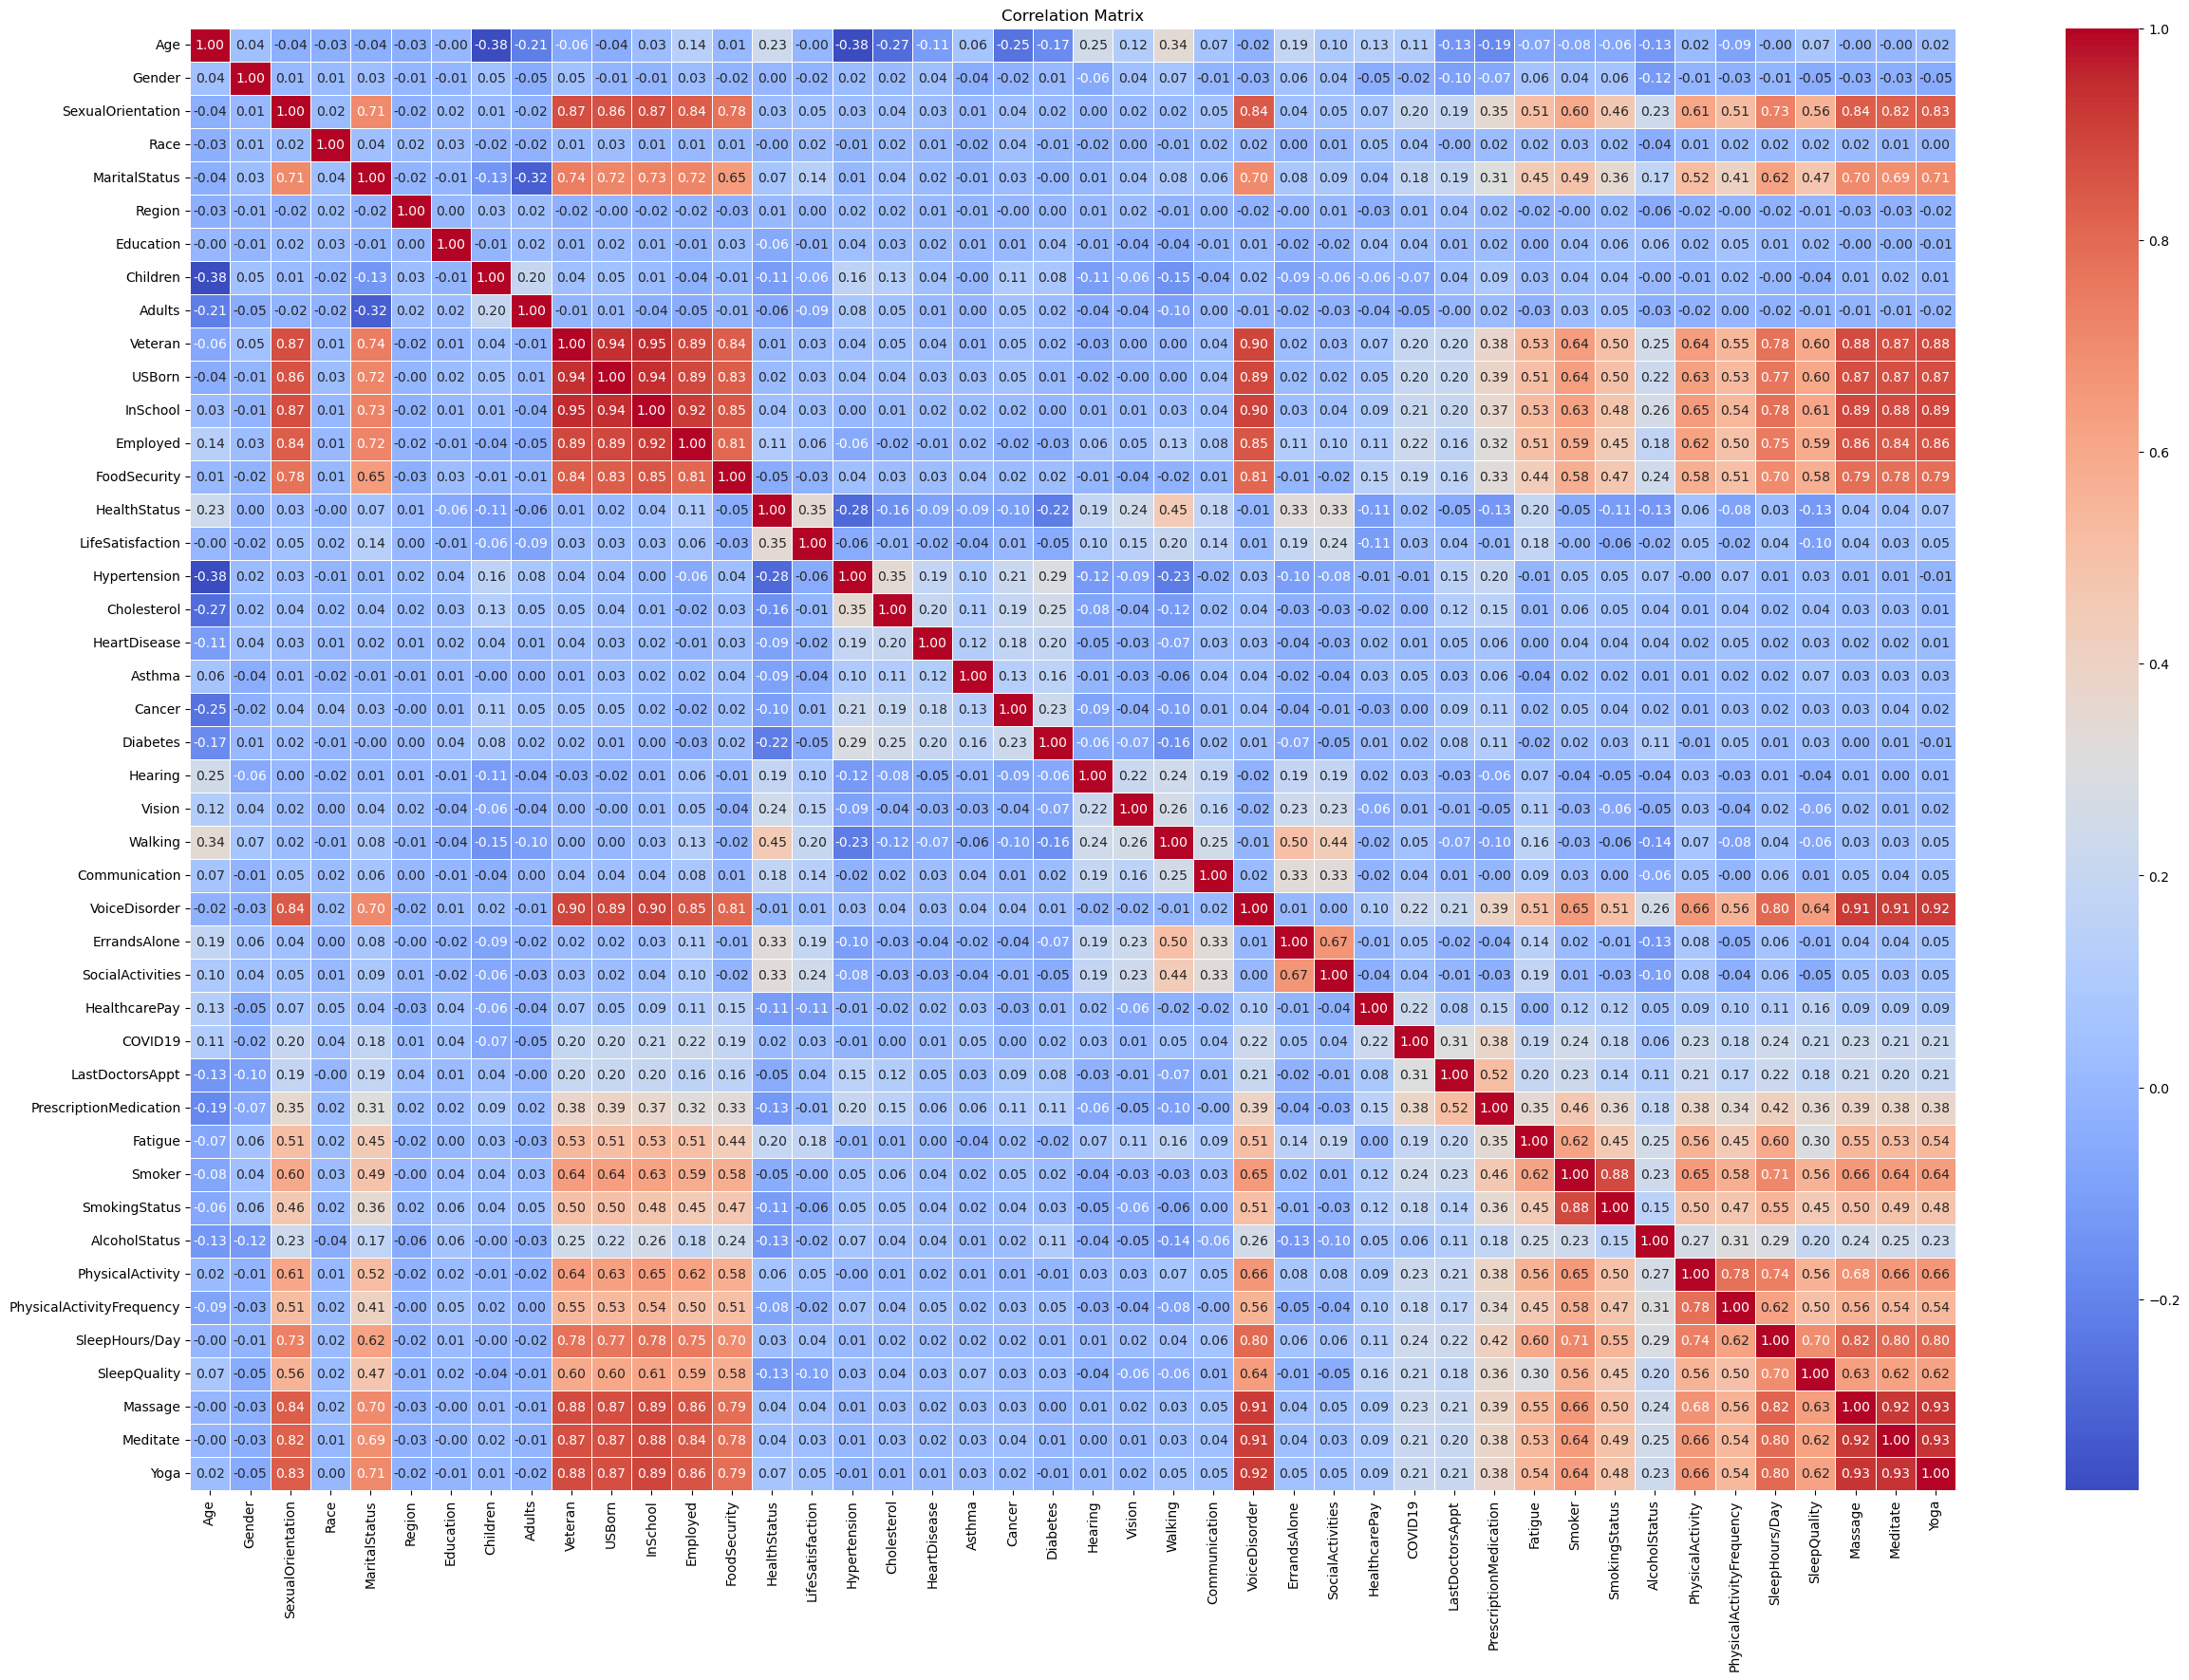

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation Matrix Plot
correlation_matrix = predVar2.drop(columns="HHX").corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show

From the correlation matrix, variables such as Yoga and Massage were not included in favor of meditation due to the high correlations. Other variables we removed were VoiceDisorder in favor of Communication, PhysicalActivityFrequency in favor of PhysicalActivity, Smoker in favor of SmokerStatus and ErrandsAlone in favor of SocialActivities.

In [10]:
#Feature Importance From Prediction
GBClassifier.fit(X_train, y_train)
FeatureImportance = pd.Series(GBClassifier.feature_importances_, index = newMH.drop(columns=["HHX", "MHTHRPY_A"]).columns)
FeatureImportanceSort = FeatureImportance.sort_values(ascending=False)
print(FeatureImportanceSort)

Age                          0.210977
SocialActivities             0.134036
Fatigue                      0.124774
Meditate                     0.118739
PrescriptionMedication       0.102715
Yoga                         0.032883
LifeSatisfaction             0.032745
Education                    0.028618
SleepQuality                 0.027568
SexualOrientation            0.026878
Massage                      0.019414
MaritalStatus                0.015333
USBorn                       0.014340
SleepHours/Day               0.009834
Region                       0.007749
InSchool                     0.007663
FoodSecurity                 0.007167
ErrandsAlone                 0.007057
Employed                     0.006893
HealthStatus                 0.006240
Race                         0.005941
Gender                       0.005742
AlcoholStatus                0.005539
Asthma                       0.005528
Adults                       0.005239
Veteran                      0.004874
LastDoctorsA

From using Feature Importance, a decision was made to remove all health conditions from our set of predictor variables. It is evident that these health conditions have little importance in predicting for those who have had Mental Health Therpy. Another reason that contributed towards the removal of health conditions was due to the overall goal of trying to only use commonly avilable and non-invasive information. It is uncommon to share if an individual was cholesterol or asthma on something like a job application. The goal of this project is to predict for mental health issues is fairly available.

In [11]:
columns_to_drop = ['Yoga', 'Massage', 'PhysicalActivityFrequency', 'HeartDisease', 'Diabetes', 'Hypertension', 'Cancer', 'COVID19', 'Cholesterol', "Asthma", "Adults", "ErrandsAlone", 'Smoker', 'VoiceDisorder']
newPredVar = predVar2.drop(columns = columns_to_drop)
          
MH = adultData[["HHX", "MHTHRPY_A"]]
newMH = pd.merge(newPredVar, MH, on="HHX")
newMH = newMH[(newMH["MHTHRPY_A"] <= 2)]

#Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(newMH.drop(columns=["HHX", "MHTHRPY_A"]), newMH["MHTHRPY_A"], test_size=0.2, random_state=55)

#Train and Predict with Random Forest Classifier
GBClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GBClassifier.fit(X_train, y_train)
GBPredict = GBClassifier.predict(X_test)

# Evaluate the model
GBAccuracy = accuracy_score(y_test, GBPredict)
print("Mental Health Accuracy:", GBAccuracy)

Mental Health Accuracy: 0.8870077291129923


By removing these variables, we are able to preserve our high level of prediction accuracy.

In [12]:
from sklearn.metrics import confusion_matrix

# Assuming y_true contains the ground truth labels and y_pred contains the predicted labels
# y_true and y_pred should be 1D arrays or lists

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, GBPredict)

# Extract elements from confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate False Positives (FP) and False Negatives (FN)
false_positives = FP
false_negatives = FN

print("False Positives (FP):", false_positives)
print("False Negatives (FN):", false_negatives)

False Positives (FP): 536
False Negatives (FN): 78


By showing a confusion matrix, we are able to highlight the inaccuracies in our prediction. Although there is a high quantity of false positives, for the purpose of this project this is alright. The reasoning is because a false positive indicates individuals who don't have mental health issues, but were predicted to have mental health issues. Simply taking action to encourage this "False Positive" individual to seek help is not an issue, but realistically a benefit. Even though if the individual may not have had mental health issues, checking in on them and providing them with resources is always a good thing. The biggest issue that needs to be tackled is the prevalence of false negatives. It is important in the future to optimize this model, but having more false positives than false negatives helps ensure individuals, regardless of their condition, have the opportunity to seek help.

## 5. Create Model For Prediction (Mental Health, Anxiety, and Depression)

In [13]:
#Anxiety Vars: ANXEV_A, ANXMED_A, ANEXLEVEL_A

temp = adultData[["HHX", "ANXEV_A"]]
newTemp = pd.merge(newPredVar, temp, on="HHX")
newTemp = newTemp[(newTemp["ANXEV_A"] <= 2)]

#Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(newTemp.drop(columns=["HHX", "ANXEV_A"]), newTemp["ANXEV_A"], test_size=0.2, random_state=55)

#Train and Predict with Random Forest Classifier
ANXEVMod = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
ANXEVMod.fit(X_train, y_train)


temp = adultData[["HHX", "ANXMED_A"]]
newTemp = pd.merge(newPredVar, temp, on="HHX")
newTemp = newTemp[(newTemp["ANXMED_A"] <= 2)]

#Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(newTemp.drop(columns=["HHX", "ANXMED_A"]), newTemp["ANXMED_A"], test_size=0.2, random_state=55)

#Train and Predict with Random Forest Classifier
ANXMedMod = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
ANXMedMod.fit(X_train, y_train)

temp = adultData[["HHX", "ANXLEVEL_A"]]
newTemp = pd.merge(newPredVar, temp, on="HHX")
newTemp = newTemp[(newTemp["ANXLEVEL_A"] <= 3)]

#Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(newTemp.drop(columns=["HHX", "ANXLEVEL_A"]), newTemp["ANXLEVEL_A"], test_size=0.2, random_state=55)

#Train and Predict with Random Forest Classifier
ANXLevelMod = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
ANXLevelMod.fit(X_train, y_train)

GradientBoostingClassifier()

In [14]:
#Mental Health Vars: MHTHRPY_A, MHRX_A, 

temp = adultData[["HHX", "MHTHRPY_A"]]
newTemp = pd.merge(newPredVar, temp, on="HHX")
newTemp = newTemp[(newTemp["MHTHRPY_A"] <= 2)]

#Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(newTemp.drop(columns=["HHX", "MHTHRPY_A"]), newTemp["MHTHRPY_A"], test_size=0.2, random_state=55)

#Train and Predict with Random Forest Classifier
MHEVMod = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
MHEVMod.fit(X_train, y_train)


temp = adultData[["HHX", "MHRX_A"]]
newTemp = pd.merge(newPredVar, temp, on="HHX")
newTemp = newTemp[(newTemp["MHRX_A"] <= 2)]

#Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(newTemp.drop(columns=["HHX", "MHRX_A"]), newTemp["MHRX_A"], test_size=0.2, random_state=55)

#Train and Predict with Random Forest Classifier
MHMedMod = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
MHMedMod.fit(X_train, y_train)

GradientBoostingClassifier()

In [15]:
#Depression Vars: DEPEV_A, DEPMED_A, DEPLEVEL_A

temp = adultData[["HHX", "DEPEV_A"]]
newTemp = pd.merge(newPredVar, temp, on="HHX")
newTemp = newTemp[(newTemp["DEPEV_A"] <= 2)]

#Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(newTemp.drop(columns=["HHX", "DEPEV_A"]), newTemp["DEPEV_A"], test_size=0.2, random_state=55)

#Train and Predict with Random Forest Classifier
DEPEVMod = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
DEPEVMod.fit(X_train, y_train)


temp = adultData[["HHX", "DEPMED_A"]]
newTemp = pd.merge(newPredVar, temp, on="HHX")
newTemp = newTemp[(newTemp["DEPMED_A"] <= 2)]

#Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(newTemp.drop(columns=["HHX", "DEPMED_A"]), newTemp["DEPMED_A"], test_size=0.2, random_state=55)

#Train and Predict with Random Forest Classifier
DEPMedMod = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
DEPMedMod.fit(X_train, y_train)

temp = adultData[["HHX", "DEPLEVEL_A"]]
newTemp = pd.merge(newPredVar, temp, on="HHX")
newTemp = newTemp[(newTemp["DEPLEVEL_A"] <= 3)]

#Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(newTemp.drop(columns=["HHX", "DEPLEVEL_A"]), newTemp["DEPLEVEL_A"], test_size=0.2, random_state=55)

#Train and Predict with Random Forest Classifier
DEPLevelMod = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
DEPLevelMod.fit(X_train, y_train)

GradientBoostingClassifier()

## 6. Web Development using Taipy
Below is the code to produce our GUI using the Taipy library.

In [16]:
from taipy.gui import Gui, notify, Markdown
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


newData = pd.DataFrame()
dataset = pd.read_csv("MentalHealthCount.csv")

root_md = "<|navbar|>"

home = Markdown("""
#B3Y0ND Wellness
##Promoting Mental Health Awareness through 30 Questions

<|layout|columns = 2 3| class_name=container align_columns_center|
    <|
###Welcome to B3Y0ND Wellness! A tool to help predict and promote the mental health of your peers.

With mental health problems on the rise, it is important as a society to encourage individuals to seek help. Using the graph, recent trends have shown:

1. Anxiety and Depression has **INCREASED** as a result of COVID19.

2. Individuals are seeking **MORE** help to deal with Mental Health

3. However, many individuals facing Anxiety or Depression are **NOT** taking advantage of Mental Health Therapy/Treatment
    |>
    <|
<|{dataset}|chart|mode=lines|x=Year|y[1]=MHTherapy|y[2]=Anxiety|y[3]=Depression|color[1]=orange|color[2]=blue|color[3]=green|height=50%|>
    |>
|>

<|layout|columns = 1 1|class_name=container align_columns_center|
    <|
##Motivation
This motivation to create B3Y0ND Wellness is centerd around two principle questions:

1. Can we accurately predict individuals who may face Mental Health problems?

2. Can we predict Mental Health problems using commonly available and non-invasive information about an individual?
    |>
    <|
##Methodology
For this project, the steps to develop B3Y0ND Wellness are as listed:

    1. Data Selection
    2. Data Cleansing
    3. Model Selection
    4. Model Optimization
    5. Web Development

*For more detailed information, please access the GitHub repository: *
    |>
|>
""")

# Definition of the page
pageOne = """
<|layout|columns = 10 1|
    <|
#30 Questions
    |>
    <|
<|Submit Resilts|button|on_action=makePredictions|>
    |>
|>              

<|layout|columns = 1 1 1|class_name=container align_columns_center|
    <|
1. Age? <|{Age}|selector|lov=18;19;20;21;22;23;24;25;26;27;28;29;30;31;32;33;34;35;36;37;38;39;40;41;42;43;44;45;46;47;48;49;50;51;52;53;54;55;56;57;58;59;60;61;62;63;64;65;66;67;68;69;70;71;72;73;74;75;76;77;78;79;80;81;82;83;84;85+|dropdown|on_change=ageAdd|> 

2. Gender? <|{Gender}|selector|lov=1. Male;2. Female|dropdown|on_change=addData|>

3. Sexual Orientation? <|{SexualOrientation}|selector|lov=1. Gay/Lesbian;2. Straight;3. Bisexual;4. Other;8. Not Ascertained|dropdown|on_change=addData|>
 
4. Race? <|{Race}|selector|lov=1. Hispanic;2. White;3. Black/African American;4. Asian;5. American Indian; 6. Other;7. Multiple Races|dropdown|on_change=addData|>

5. Marital Status? <|{MaritalStatus}|selector|lov=1. Married;2. Living with a Partner Unmarried;3. Neither;8. Not Ascertained|dropdown|on_change=addData|>

6. Living Region? <|{Region}|selector|lov=1. Northeast;2. Midwest;3. South;4. West|dropdown|on_change=addData|>

7. Highest Education Level? <|{Education}|selector|lov=1. Grade 1-11;2. 12th Grade (No Diploma);3. GED or Equivalent;4. High School Graduate;5. College (No Degree);6. Associates: Technical/Occupational;7. Associates: Academic;8. Bachelor's;9. Master's;10. Professional/Doctoral;98. Not Ascertained|dropdown|on_change=addData|>

8. Number of Children? <|{Children}|selector|lov=0. 0 Children;1. 1 Child;2. Children;3. 3+ Children|dropdown|on_change=addData|>

9. Veteran? <|{Veteran}|selector|lov=1. Yes;2. No;8. Not Ascertained|dropdown|on_change=addData|>

10. Born in the USA? <|{USBorn}|selector|lov=1. Yes;2. No;8. Not Ascertained|dropdown|on_change=addData|>
    |>
    <|
11. Currently in School? <|{InSchool}|selector|lov=1. Yes;2. No;8. Not Ascertained|dropdown|on_change=addData|>

12. Employed? <|{Employed}|selector|lov=1. Yes;2. No;8. Not Ascertained|dropdown|on_change=addData|>

13. Worried About Affording Food? <|{FoodSecurity}|selector|lov=1. Often True;2. Sometimes True;3. Never True; 8. Not Ascertained|dropdown|on_change=addData|>

14. Health Status? <|{HealthStatus}|selector|lov=1. Excellent;2. Very Good;3. Good;4. Fair;5, Poor|dropdown|on_change=addData|>

15. Life Satisfaction? <|{LifeSatisfaction}|selector|lov=1. Very Satisfied;2. Satisfied;3. Disatisfied;4. Very Disatisfied|dropdown|on_change=addData|>

16. Hearing Problems? <|{Hearing}|selector|lov=1. No Difficulty;2. Some Difficulty;3. A Lot of Difficulty;4. Cannot At All|dropdown|on_change=addData|>

17. Vision Problems? <|{Vision}|selector|lov=1. No Difficulty;2. Some Difficulty;3. A Lot of Difficulty;4. Cannot At All|dropdown|on_change=addData|>

18. Mobility Problems? <|{Walking}|selector|lov=1. No Difficulty;2. Some Difficulty;3. A Lot of Difficulty;4. Cannot At All|dropdown|on_change=addData|>

19. Communication Problems? <|{Communication}|selector|lov=1. No Difficulty;2. Some Difficulty;3. A Lot of Difficulty;4. Cannot At All|dropdown|on_change=addData|>

20. Difficulty in Social Activities? <|{SocialActivities}|selector|lov=1. No Difficulty;2. Some Difficulty;3. A Lot of Difficulty;4. Cannot At All|dropdown|on_change=addData|>
    |>
    <|
21. Healthcare Pay? <|{HealthcarePay}|selector|lov=1. Very Worried;2. Somewhat Worried;3. Not Worried At All|dropdown|on_change=addData|>

22. Last Doctors Appointment? <|{LastDoctorsAppt}|selector|lov=1. Within Past Year;2. Within Last 2 Years;3. Within Last 3 Years;4. Within Last 5 Years;5. Within Last 10 Years;6. 10+ Years;7. Refuse to Go;8. Not Ascertained|dropdown|on_change=addData|>

23. Prescription Medication? <|{PrescriptionMedication}|selector|lov=1. Yes;2. No;8. Not Ascertained|dropdown|on_change=addData|>

24. Fatigue? <|{Fatigue}|selector|lov=1. Never;2. Some Days;3. Most Days;4. Every Day;8. Not Ascertained|dropdown|on_change=addData|>

25. Smoking Status? <|{SmokingStatus}|selector|lov=1. Current Everyday Smoker;2. Current Some Day Smoker;3. Former Smoker;4. Never Smoker;8. Not Ascertained|dropdown|on_change=addData|>

26. Alcohol Status? <|{AlcoholStatus}|selector|lov=1. Current Everyday Smoker;2. Current Some Day Smoker;3. Former Smoker;4. Never Smoker;8. Not Ascertained|dropdown|on_change=addData|>

27. Physical Activity? <|{PhysicalActivity}|selector|lov=1. Lifetime Abstainer;2. Former Infrequent;3. Former Regular;4. Former Unknown Frequency;5. Current Infrequent;6. Current Light;7. Current Moderate;8. Current Heavier;9. Current Drinker Unknown Frequency;10. Unknown Status|dropdown|on_change=addData|>

28. Hours of Sleep per Day? <|{SleepHours/Day}|selector|lov=1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24|dropdown|on_change=addData|>

29. Well-Rested Frequency? <|{SleepQuality}|selector|lov=1. Never;2. Some Days;3. Most Days;4. Every Day;8. Not Ascertained|dropdown|on_change=addData|>

30. Meditation? <|{Meditate}|selector|lov=1. Yes;2. No; 8. Not Ascertained|dropdown|on_change=addData|>
    |>
|>
"""
notification = "Processing. . . Please answer all 30 Questions!"
pageTwo = """
#Results and Taking Action
 <|{notification}|text|>

 
 <|Mental Health|expandable|expanded=False|partial={MHPartial}|>
 
 <|Anxiety|expandable|expanded=False|partial={anxietyPartial}|>
 
 <|Depression|expandable|expanded=False|partial={depressionPartial}|>
 
 <|Taking Action|expandable|expanded=False|partial={actionPartial}|>
 
"""

def on_change(state, var_name, var_value):
    if var_name == "text" and var_value == "Reset":
        state.text = ""
        return

def ageAdd(state, var_name, var_value):
    newData.loc[0, var_name] = int(var_value)
    
def addData(state, var_name, var_value):
    newData.loc[0, var_name] = int(var_value[0:1])
    
MHProb = None
MHMed = None
ANXProb = None
ANXMed = None
ANXLevel = None
DEPProb = None
DEPMed = None
DEPLevel = None
MHFeedback = None
ANXFeedback = None
DEPFeedback = None
    
def makePredictions(state):
    if len(newData.columns) == 30:
        state.notification = "Below are three drop-down menus for Mental Health, Anxiety, and Depression. In each drop-down you will see the predictive results as well as suggestions on how to take action!"    
        
        predictingData = newData[["Age", "Gender", "SexualOrientation", "Race", "MaritalStatus", "Region", "Education", "Children", "Veteran", "USBorn", "InSchool", "Employed", 
            "FoodSecurity", "HealthStatus", "LifeSatisfaction", "Hearing", "Vision", "Walking", "Communication", "SocialActivities", "HealthcarePay", 
            "LastDoctorsAppt", "PrescriptionMedication", "Fatigue", "SmokingStatus", "AlcoholStatus", "PhysicalActivity", "SleepHours/Day", "SleepQuality", "Meditate"]]
        
        MHEver = MHEVMod.predict(predictingData)[0]
        if MHEver == 1.0:
            state.MHProb = "Probable"
        else:
            state.MHProb = "Unlikely"
            
        MHMed = MHMedMod.predict(predictingData)[0]
        if MHMed == 1.0:
            state.MHMed = "Probable"
        else:
            state.MHMed = "Unlikely"
            
        if (MHEver + MHMed) <= 3:
            state.MHFeedback = "This individual is predicted to have some probable chance of dealing with Mental Health problems. Refer to the resources tab below."
        else:
            state.MHFeedback = "This individual is predicted to unlikely be dealing with Mental Health problems."
            
        anxietyEver = ANXEVMod.predict(predictingData)[0]
        if anxietyEver == 1.0:
            state.ANXProb = "Probable"
        else:
            state.ANXProb = "Unlikely"
            
        anxietyMeds = ANXMedMod.predict(predictingData)[0]
        if anxietyMeds == 1.0:
            state.ANXMed = "Probable"
        else:
            state.ANXMed = "Unlikely"
        
        anxietyLevel = ANXLevelMod.predict(predictingData)[0]
        if anxietyLevel == 1.0:
            state.ANXLevel = "Little Anxiety"
        if anxietyLevel == 2.0:
            state.ANXLevel = "A Lot of Anxiety"
        else:
            state.ANXLevel = "Moderate"
            
        if (anxietyEver + anxietyMeds + anxietyLevel) <= 5:
            state.ANXFeedback = "This individual is predicted to have some probable chance of dealing with Mental Health problems. Refer to the resources tab below."
        else:
            state.ANXFeedback = "This individual is predicted to unlikely be dealing with Mental Health problems."
            
        depressionEver = DEPEVMod.predict(predictingData)[0]
        if depressionEver == 1.0:
            state.DEPProb = "Probable"
        else:
            state.DEPProb = "Unlikely"
            
        depressionMeds = DEPMedMod.predict(predictingData)[0]
        if depressionMeds == 1.0:
            state.DEPMed = "Probable"
        else:
            state.DEPMed = "Unlikely"
        
        depressionLevel = DEPLevelMod.predict(predictingData)[0]
        if depressionLevel == 1.0:
            state.DEPLevel = "Little Depression"
        if depressionLevel == 2.0:
            state.DEPLevel = "A Lot of Depression"
        else:
            state.DEPLevel = "Moderate"
        
        if (depressionEver + depressionMeds + depressionLevel) <= 5:
            state.DEPFeedback = "This individual is predicted to have some probable chance of dealing with Mental Health problems. Refer to the resources tab below."
        else:
            state.DEPFeedback = "This individual is predicted to unlikely be dealing with Mental Health problems."
    
    else: 
        notify(state, "error", f"Must answer all 30 Questions before continuing!")

mentalHealthPage = """
<|layout|columns = 1 1|
    <|
###Mental Health Illness: <|{MHProb}|text|>
    |>
    <|
###Need for Mental Health Medication: <|{MHMed}|text|>
    |>
|>  

###Feedback: <|{MHFeedback}|text|>
"""

anxietyPage = """
<|layout|columns = 1 1 1|
    <|
###Anxiety Likelihood: <|{ANXProb}|text|>
    |>
    <|
###Need for Anxiety Medication: <|{ANXMed}|text|>
    |>
    <|
###Anxiety Level: <|{ANXLevel}|text|> 
    |>
|>

###Feedback: <|{ANXFeedback}|text|>
"""

depressionPage = """
<|layout|columns = 1 1 1|
    <|
###Depression Likelihood: <|{DEPProb}|text|>
    |>
    <|
###Need for Depression Medication: <|{DEPMed}|text|>
    |>
    <|
###Depression Level: <|{DEPLevel}|text|> 
    |>
|>

###Feedback: <|{DEPFeedback}|text|>
"""

actionPage = """
###Methods of Dealing with Mental Health Problems
1. Don't be afraid to seek Mental Health therapy
2. Keep Physically Active
3. Avoid Smoking, Alcohol, Drugs
4. Ask your Doctor about Medications
5. Maintain Relationships with Close Ones
6. Diet

Please refer to the CDC for more information: [CDC Mental Health Page](https://www.cdc.gov/mentalhealth/index.htm)
"""
   
pages = {
    "/" : root_md,
    "Welcome" : home,
    "B3Y0NDWellness" : pageOne,
    "Results" : pageTwo
}

gui = Gui(pages=pages)
MHPartial = gui.add_partial(mentalHealthPage)
anxietyPartial = gui.add_partial(anxietyPage)
depressionPartial = gui.add_partial(depressionPage)
actionPartial = gui.add_partial(actionPage)
gui.run(port = 5011, dark_mode = False)

[2024-02-11 06:15:36][Taipy][INFO] Running in 'single_client' mode in notebook environment
[2024-02-11 06:15:36][Taipy][INFO]  * Server starting on http://127.0.0.1:5011


--- 1 warning(s) were found for page 'Welcome'  ---
 - Warning 1: Bad Taipy property format at line 5: ' class_name=container align_columns_center'.
----------------------------------------------------

--- 92 warning(s) were found for page 'B3Y0NDWellness' in variable 'pageOne' ---
 - Warning 1: Variable 'Meditate' is not available in either the '__main__' or '__main__' modules.
 - Warning 2: Variable 'Meditate' is not defined (in expression '{Meditate}'):
'types.SimpleNamespace' object has no attribute 'Meditate'
 - Warning 3: Cannot evaluate expression 'Meditate':
name 'Meditate' is not defined
 - Warning 4: Variable 'SleepQuality' is not available in either the '__main__' or '__main__' modules.
 - Warning 5: Variable 'SleepQuality' is not defined (in expression '{SleepQuality}'):
'types.SimpleNamespace' object has no attribute 'SleepQuality'
 - Warning 6: Cannot evaluate expression 'SleepQuality':
name 'SleepQuality' is not defined
 - Warning 7: Variable 'SleepHours' is not availab